# 對偶支撐向量機(Dual Support Vector Machine)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import random
import cvxopt
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

##### 設定我們有60個點，其中30個是圈圈，30個是叉叉

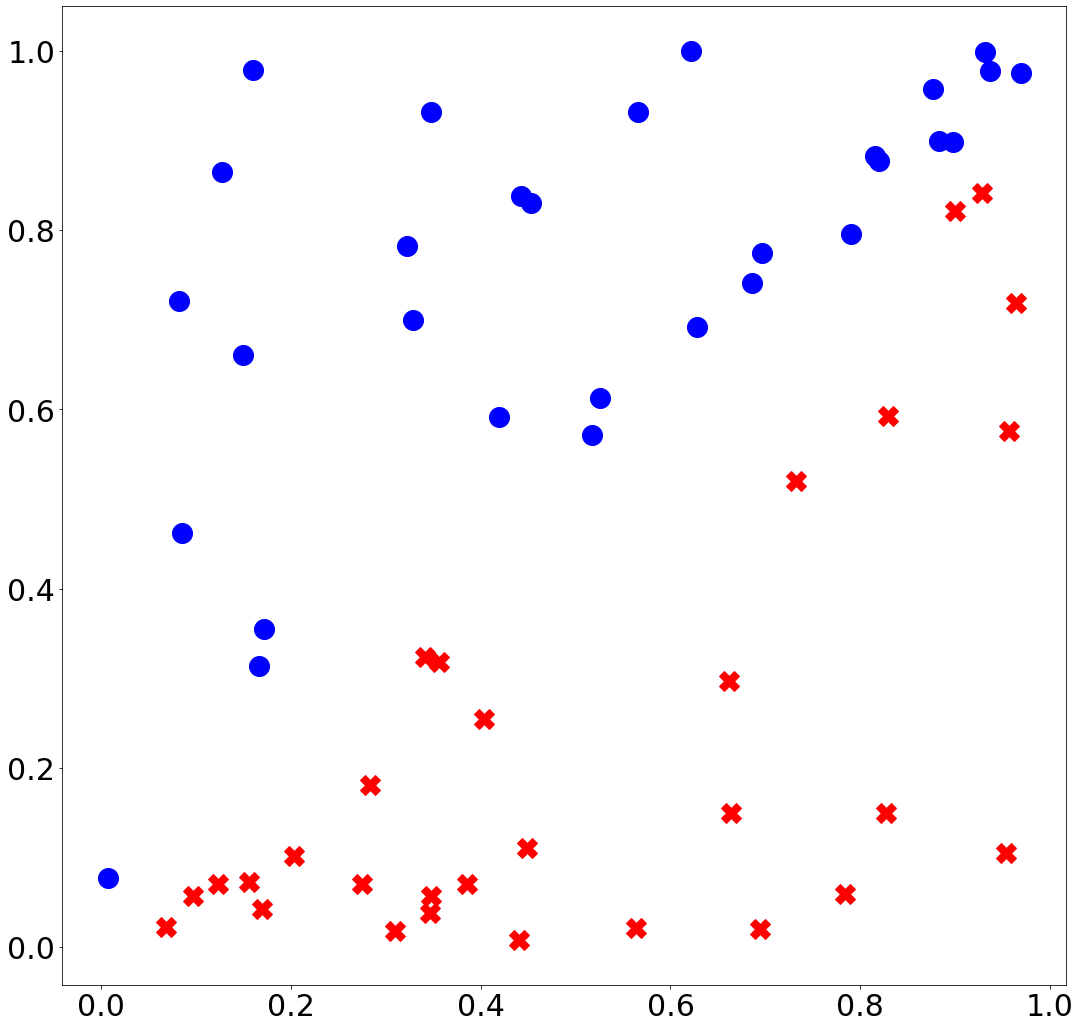

In [2]:
# 這裡我們建立一個60*2的矩陣x
# 60代表我們有60個點，2代表為2維空間(平面)
x=np.zeros((60,2))
# 這裡我們建立一個長度60的向量y
# 用來儲存我們的標記資料是圈圈(+1)還是叉叉(-1)
y=np.zeros(60)
# 因為有60筆資料，所以跑60個迴圈
for i in range(0,60): 
    # 標記y前半段0~29為圈圈(+1)，後半段30~59為叉叉(-1)
    # 也就是圈圈30個點，叉叉30個點
    f=0
    if(i<30):
        y[i]=1
        x[i,0]=random.random()
        x[i,1]=random.uniform(x[i,0],1)
    else:
        y[i]=-1
        x[i,0]=random.random()
        x[i,1]=random.uniform(0,x[i,0])-f
    # 這裡我們隨機給定我們資料的位置
    # 而f可以決定我們圈圈和叉叉兩組數據分的越開或是越近
    
# 設定我們輸出圖片的大小
plt.rcParams["figure.figsize"] = (18,18)
#畫出圈圈的點，bo：b代表藍色、o代表圈圈、marksize為大小
plt.plot(x[:30,0],x[:30,1],"bo",markersize=20)
#畫出叉叉的點，rX：r代表紅色、X代表叉叉、marksize為大小
plt.plot(x[30:,0],x[30:,1],"rX",markersize=20)
# 設定x和y軸座標的字體大小
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
#畫出來
plt.show()

# 特徵轉換

In [3]:
# 我們總共有60個點
N=60
# c代表轉換的次方數
c=3
# D為每筆特徵的個數
D=int((c+1)*(c+2)/2)
# 創建z矩陣
z=np.ones((60,D))
z[:,1:3]=x
k=3
# 計算特徵
for i in range(2,c+1):
    for j in range(0,i+1):
        z[:,k]=(x[:,1]**j)*(x[:,0]**(c-j))
        k+=1

# 二次規劃

In [4]:
# 二次規劃
Q = cvxopt.matrix((np.outer(y,y) * np.dot(z,z.T)))
p = cvxopt.matrix(np.ones(N)*-1.,(N,1))
G = cvxopt.matrix(np.diag(np.ones(N)* -1.)) 
h = cvxopt.matrix(np.zeros(N))
A = cvxopt.matrix(y,(1,N))
b = cvxopt.matrix(0.0)
# 利用cvxopt套件求解
cvxopt.solvers.options['show_progress'] = False
cvxopt.solvers.options['abstol'] = 1e-10
cvxopt.solvers.options['reltol'] = 1e-10
cvxopt.solvers.options['feastol'] = 1e-10

# 求出alpha值
a=np.array(cvxopt.solvers.qp(Q, p, G, h, A, b)['x']).flatten()
# 計算權重和截距
w=np.zeros(D)
w = np.dot(z.T,y*a)
s=a>1e-6
for i in range(0,N):
    if(a[i]>1e-6):
        index=i
w[0]=y[index]-np.dot(w,z[index,:])

# 視覺化

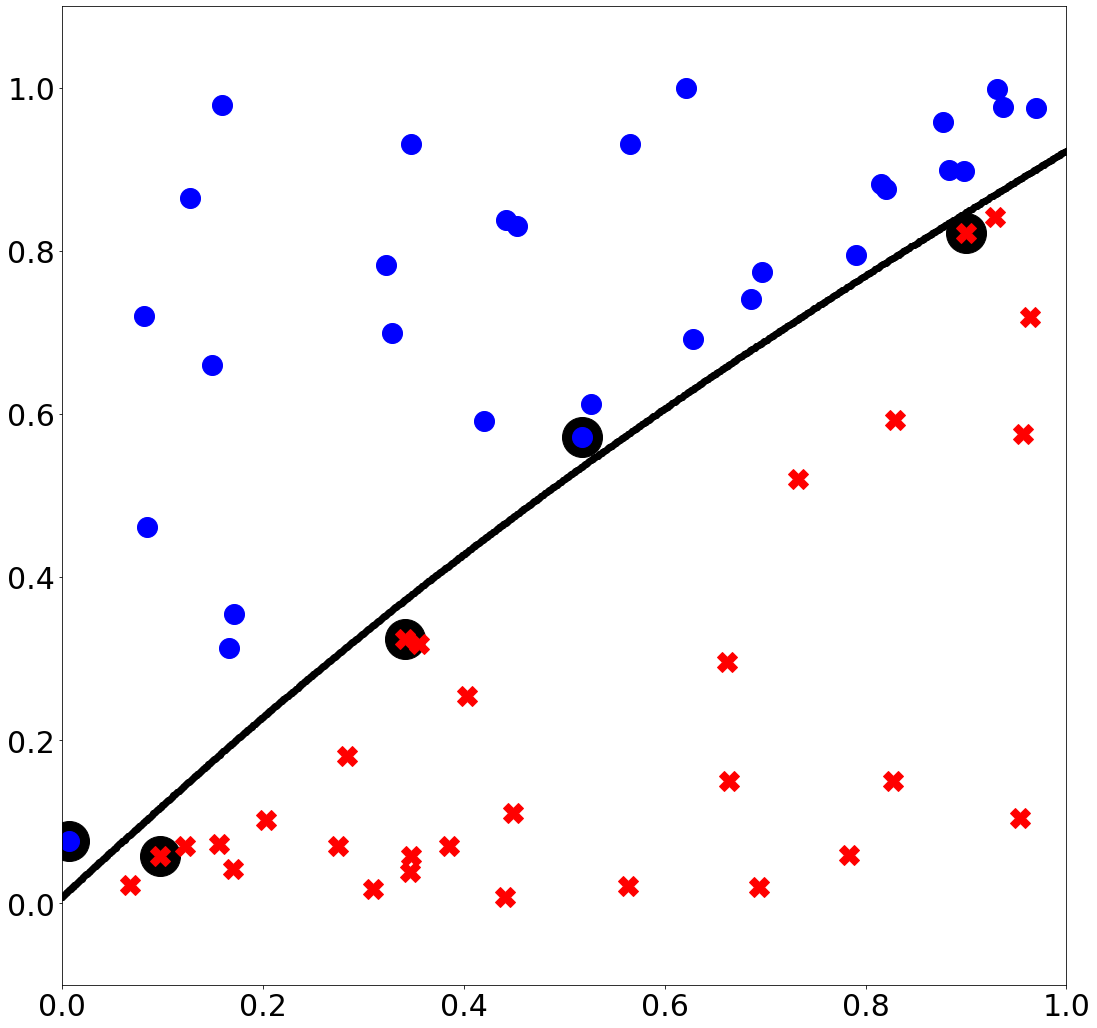

In [5]:
# 繪圖
plt.rcParams["figure.figsize"] = (18,18)
# 畫出所有的數據點和支撐向量
for i in range(0,N):
    if(a[i]>1e-6):
        plt.plot(x[i,0],x[i,1],"ko",markersize=40)
plt.plot(x[:30,0],x[:30,1],"bo",markersize=20)
plt.plot(x[30:,0],x[30:,1],"rX",markersize=20)

###### 這邊帶入x1求解 ######
x1=np.linspace(0,1,500)
for i in range(0,len(x1)):
    plot1=np.zeros(c+1)
    g=0
    for j in range(0,c+2):
        for k in range(0,j):
            plot1[c-k]+=w[g]*(x1[i]**(j-k-1))
            g+=1
    temp=np.roots(plot1)
    for tt in temp:
        if isinstance(tt,complex):
            if(tt.imag==0):
                plt.plot(x1[i],tt.real,"ko")
        else:
            plt.plot(x1[i],tt,"ko")

###### 這邊帶入x2求解 ######
x2=np.linspace(0,1,500)
for i in range(0,len(x2)):
    plot2=np.zeros(c+1)
    g=0
    for j in range(0,c+2):
        for k in range(0,j):
            plot2[c-j+k+1]+=w[g]*(x2[i]**k)
            g+=1
    temp=np.roots(plot2)
    for tt in temp:
        if isinstance(tt,complex):
            if(tt.imag==0):
                plt.plot(tt.real,x2[i],"ko")
        else:
            plt.plot(tt,x2[i],"ko")
            

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlim([-0,1])
plt.ylim([-0.1-f,1.1])
plt.show()